In [1]:
import arrow
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import traceback
import ujson as json

from bs4 import BeautifulSoup
from bs4.element import NavigableString
from collections import defaultdict

In [2]:
data = []
path = 'data/joke/line.json'
for line in open(path):
    d = json.loads(line)
    # convert to TW time
    atime = arrow.get(d['time']).shift(hours=8)
    if arrow.get('20190101', 'YYYYMMDD') <= atime < arrow.get('20200701', 'YYYYMMDD'):
        push = 0
        for r in d['Responses']:
            if r['ResponseTime'] - d['time'] > 86400 * 7:
                continue
            if r['Vote'] == '推':
                push += 1
            elif r['Vote'] == '噓':
                push -= 1
        data.append((d, push))
print(len(data))

19644


19644 2433 0.12431276725717777
count    19644.000000
mean        13.879454
std         53.531679
min       -500.000000
25%         -2.000000
50%          0.000000
75%          5.000000
max       1370.000000
dtype: float64
100%: 1370
90%: 44
80%: 8
70%: 3
60%: 1
50%: 0
40%: -1
30%: -1
20%: -2
10%: -4
0%: -500
total 19644 average 13.879454 std 53.530316


(array([ 745., 1284., 1830., 2613., 2837., 1639.,  979.,  670.,  493.,
         383.,  358.,  321.,  263.,  196.,   90.,   59.,   68.,   46.,
          68.,   61.,   49.,   63.,   54.,   41.,   49.]),
 array([-4.  , -3.04, -2.08, -1.12, -0.16,  0.8 ,  1.76,  2.72,  3.68,
         4.64,  5.6 ,  6.56,  7.52,  8.48,  9.44, 10.4 , 11.36, 12.32,
        13.28, 14.24, 15.2 , 16.16, 17.12, 18.08, 19.04, 20.  ]),
 <a list of 25 Patch objects>)

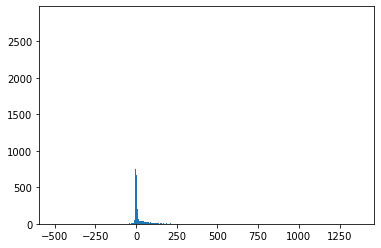

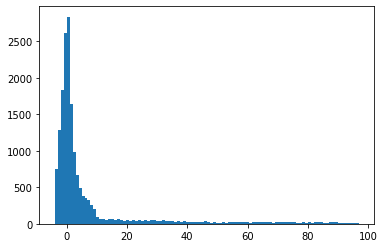

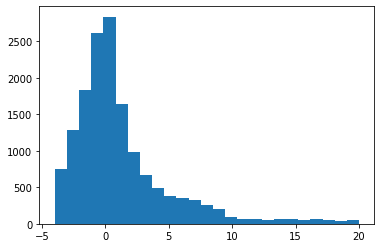

In [3]:
# draw distribution
x = [p for _, p in data]
print(len(x), len(list(filter(lambda v: v >= 30, x))), 2442/19644)
print(pd.Series(x).describe())
for i in np.arange(100, -1, -10):
    print('%d%%: %d' % (i, np.percentile(x, i)))
print('total %d average %f std %f' % (len(x), np.mean(x), np.std(x)))
plt.hist(x, bins=max(x) - min(x) + 1)
plt.figure()
plt.hist([xx for xx in x if -4 <= xx <= 97], bins=102)
plt.figure()
plt.hist([xx for xx in x if -4 <= xx <= 20], bins=25)

In [4]:
cnt = defaultdict(lambda: [0, 0])
for d, p in data:
    title = d['Title'].replace('Re: ', '')
    if title[0] == '[' and title[3] == ']':
        category = title[1:3]
        cnt[category][0] += 1
        cnt[category][1] += p
total = len(data) # sum(cnt.values())
print(total)
print('category, number of posts, ratio, average push')
for k, (c, p) in sorted(cnt.items(), key=lambda x: -x[1][0]):
    print(k, c, c / total, p / c)

19644
category, number of posts, ratio, average push
猜謎 6055 0.3082366116880472 2.6761354252683733
ＸＤ 3884 0.19771940541641214 24.376673532440783
耍冷 3418 0.1739971492567705 9.684025746050322
笑話 1873 0.09534717980044798 8.624132407901762
趣事 1105 0.05625127265322745 12.212669683257918
趣圖 952 0.048462634901242106 25.519957983193276
影音 591 0.030085522296884545 13.774957698815566
地獄 451 0.02295866422317247 6.07760532150776
豪洨 99 0.005039706780696396 19.404040404040405
公告 72 0.0036652412950519244 5.888888888888889
XD 17 0.0008654041946650376 4.823529411764706
新聞 15 0.0007635919364691509 49.46666666666667
雲蟲 12 0.0006108735491753207 -2.4166666666666665
問卦 10 0.0005090612909794339 78.0
發誓 8 0.00040724903278354713 27.25
參選 7 0.0003563429036856037 23.142857142857142
上奏 4 0.00020362451639177357 31.25
自創 3 0.00015271838729383018 282.6666666666667
問題 3 0.00015271838729383018 -1.6666666666666667
漫畫 3 0.00015271838729383018 79.33333333333333
轉錄 3 0.00015271838729383018 15.666666666666666
翻譯 3 0.00015